# Railway Incidents Data - Time Series Data

## This script contains the following:
1. Importing Libraries
2. Importing Data
3. Checking Data
4. Creating Time Series Subset
5. Time-series analysis: decomposition
6. Testing for stationarity
7. Test for autocorrelation

# 1. Importing Libraries


In [1]:
# Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
%matplotlib inline

# 2. Importing Data


In [3]:
# Project folder path
path=r'C:\Users\maryn\Documents\Data Projects\Railway Incidents Data'

In [4]:
# Import dataset RID_clean_1.csv
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'RID_clean_1.csv'), index_col = False)

# 3. Checking Data

In [5]:
df.head()

,Unnamed: 0,reporting_railroad_code,railroad_name,year,accident_id,month,accident_type,state,fra_district,train_speed,temperature,visibility,weather_condition,has_passengers,damage_cost,persons_killed,persons_injured
0,0,NICD,Northern Indiana Commuter Transportation District,2017,N1700013,6,Derailment,ILLINOIS,4,10.0,65.0,Day,Clear,Yes,0.0,0.0,0.0
1,1,NIRC,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,2017,201707188,6,Derailment,ILLINOIS,4,0.0,65.0,Day,Clear,Unknown,0.0,0.0,0.0
2,2,CR,Conrail,1981,0420001,4,Side collision,NEW YORK,1,0.0,28.0,Day,Snow,No,0.0,0.0,0.0
3,3,IC,Illinois Central Railroad Company,2007,543854,1,Derailment,LOUISIANA,5,4.0,56.0,Day,Cloudy,No,0.0,0.0,0.0
4,4,IC,Illinois Central Railroad Company,2017,938223,10,Hwy-rail crossing,ILLINOIS,4,0.0,66.0,Dark,Clear,No,0.0,0.0,1.0


In [6]:
df.shape

(210666, 17)

In [7]:
# Check for missing values 
df.isnull().sum()

Unnamed: 0                 0
reporting_railroad_code    0
railroad_name              0
year                       0
accident_id                0
month                      0
accident_type              0
state                      0
fra_district               0
train_speed                0
temperature                0
visibility                 0
weather_condition          0
has_passengers             0
damage_cost                0
persons_killed             0
persons_injured            0
dtype: int64

In [8]:
# Check for duplicates
dups = df.duplicated()
dups.sum()

0

# 4. Creating Time Series Subset

In [9]:
df.dtypes

Unnamed: 0                   int64
reporting_railroad_code     object
railroad_name               object
year                         int64
accident_id                 object
month                        int64
accident_type               object
state                       object
fra_district                 int64
train_speed                float64
temperature                float64
visibility                  object
weather_condition           object
has_passengers              object
damage_cost                float64
persons_killed             float64
persons_injured            float64
dtype: object

In [10]:
# Convert the 'year' index to a DatetimeIndex
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.set_index('year', inplace=True)

In [11]:
df.head()

,Unnamed: 0,reporting_railroad_code,railroad_name,accident_id,month,accident_type,state,fra_district,train_speed,temperature,visibility,weather_condition,has_passengers,damage_cost,persons_killed,persons_injured
year,,,,,,,,,,,,,,,,
2017-01-01,0,NICD,Northern Indiana Commuter Transportation District,N1700013,6,Derailment,ILLINOIS,4,10.0,65.0,Day,Clear,Yes,0.0,0.0,0.0
2017-01-01,1,NIRC,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,201707188,6,Derailment,ILLINOIS,4,0.0,65.0,Day,Clear,Unknown,0.0,0.0,0.0
1981-01-01,2,CR,Conrail,0420001,4,Side collision,NEW YORK,1,0.0,28.0,Day,Snow,No,0.0,0.0,0.0
2007-01-01,3,IC,Illinois Central Railroad Company,543854,1,Derailment,LOUISIANA,5,4.0,56.0,Day,Cloudy,No,0.0,0.0,0.0
2017-01-01,4,IC,Illinois Central Railroad Company,938223,10,Hwy-rail crossing,ILLINOIS,4,0.0,66.0,Dark,Clear,No,0.0,0.0,1.0


In [12]:
# Aggregate the data by year to count the number of accidents
accidents_by_year = df.resample('A').size().to_frame(name='number_of_accidents')

In [13]:
accidents_by_year.head()

,number_of_accidents
year,
1975-12-31,9273
1976-12-31,12119
1977-12-31,12363
1978-12-31,13428
1979-12-31,11787


In [14]:
accidents_by_year.shape

(48, 1)

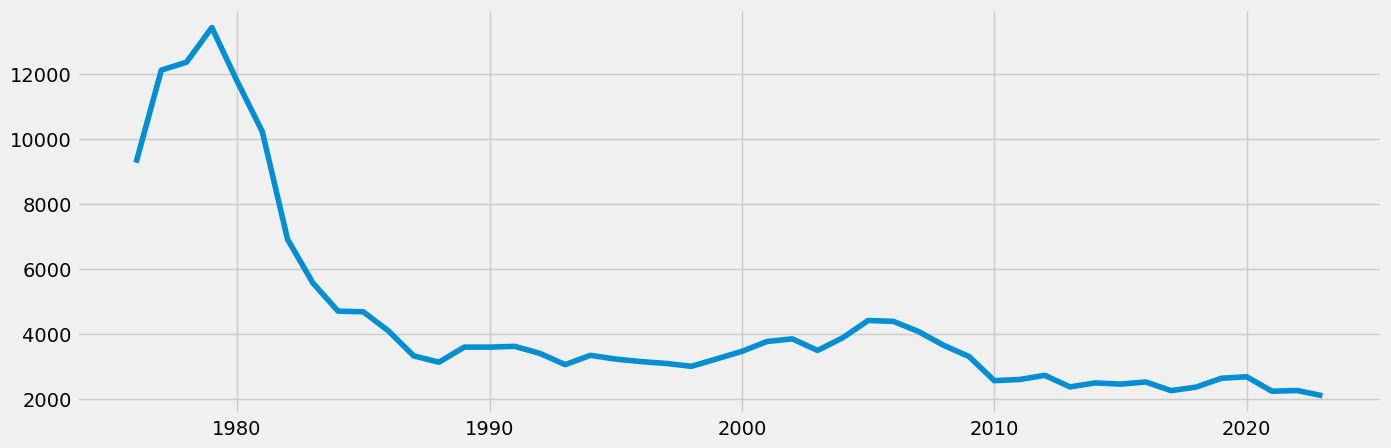

In [15]:
# Plot the subset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(accidents_by_year)

# 5. Time-series analysis: decomposition

In [16]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(accidents_by_year, model='additive')

In [17]:
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

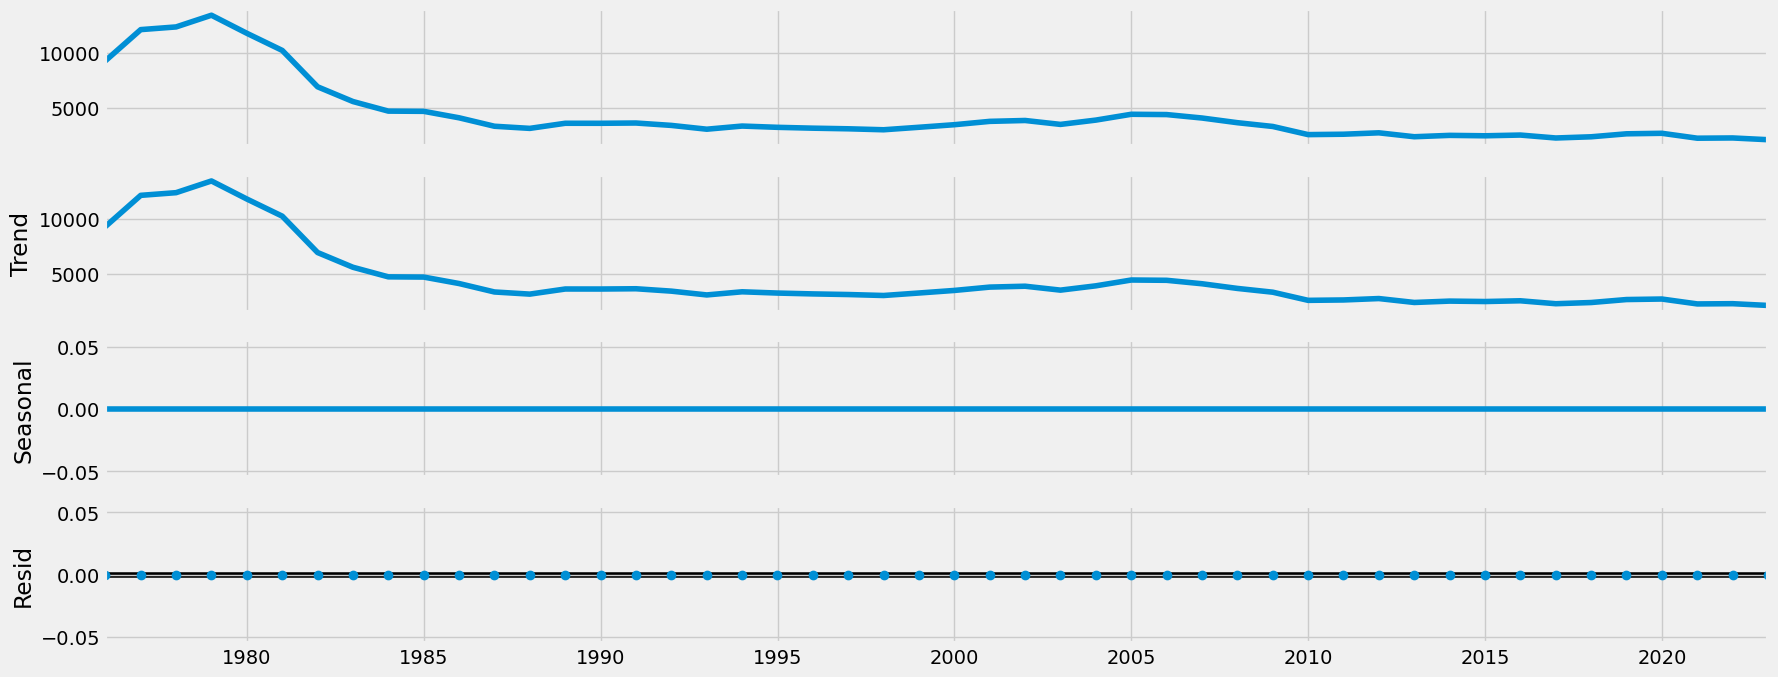

In [18]:
# Plot the separate components
decomposition.plot()
plt.show()

### There is a clear downward trend from the mid-1970s to the early 2000s, indicating a decrease in the number of accidents during this period.
### From the early 2000s onward, the trend stabilises, suggesting that the number of accidents has remained relatively constant over the last two decades.

### In this case, the seasonal component appears to be a flat line at zero, indicating that there is no seasonal pattern in the annual number of railway accidents. This makes sense because the data is aggregated yearly, and any seasonal variations within a year would not be visible.

### The residuals fluctuate around zero, indicating that there are no significant patterns left unexplained by the trend and seasonal components.

# 6. Testing for stationarity

In [21]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(accidents_by_year['number_of_accidents'])

Dickey-Fuller Stationarity test:
Test Statistic                 -4.148396
p-value                         0.000805
Number of Lags Used             1.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


### The test statistic (-4.148396) is less than all the critical values at the 1%, 5%, and 10% levels. This indicates that the null hypothesis can be rejected at these significance levels.
### The p-value (0.000805) is very low, much lower than the typical significance level of 0.05. So it does not look like we need to do any differencing.

# 7. Test for autocorrelation

In [22]:
 # Import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

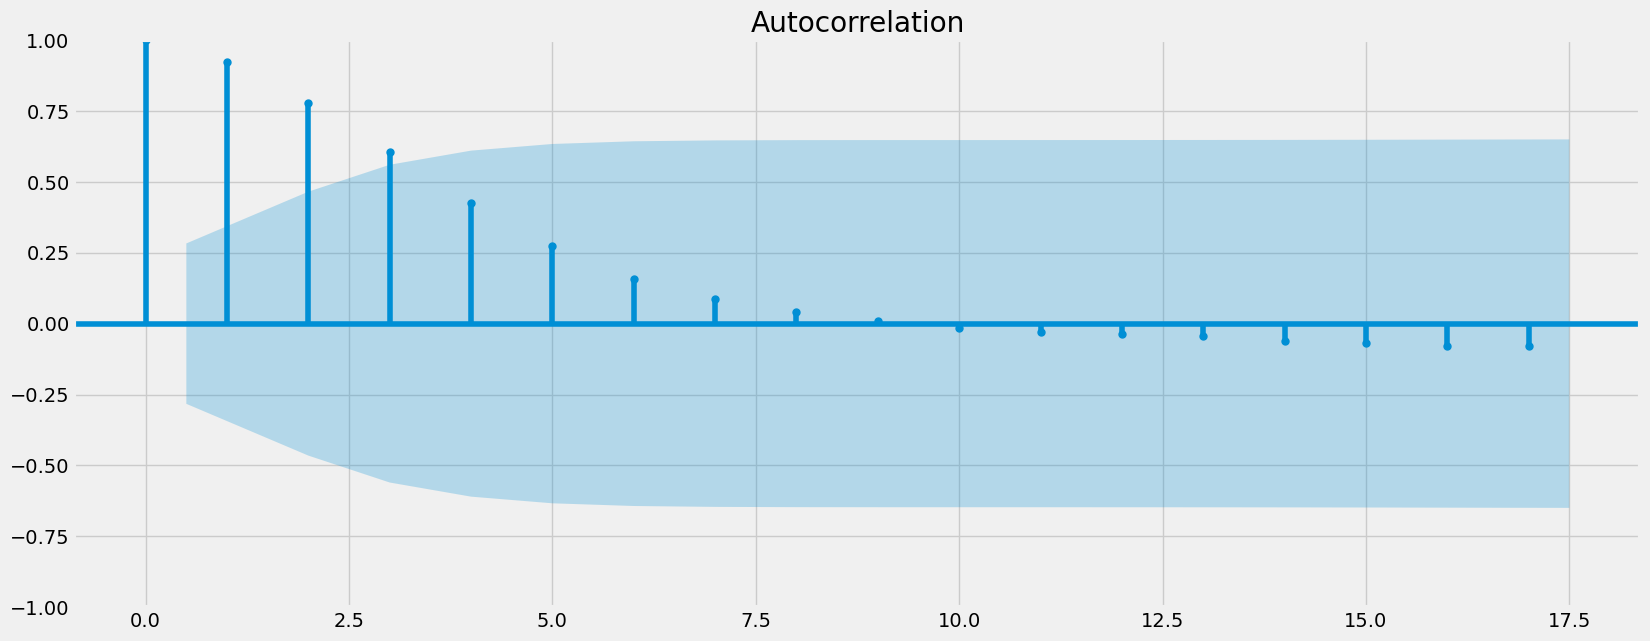

In [24]:
# Check out a plot of autocorrelations
plot_acf(accidents_by_year)
plt.show()

### The time series shows significant positive autocorrelation for the first few lags, suggesting some degree of short-term correlation in the data.
### The gradual decay of the autocorrelation function is consistent with the behavior of a stationary series.
### Overall, this autocorrelation plot, together with the Dickey-Fuller test result, confirms that the time series is stationary.